In [2]:
import numpy as np
import sys

# Вариант 2

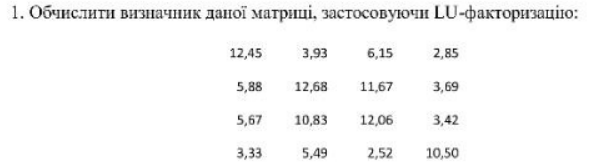

In [ ]:
a = np.array([[12.45, 3.93, 6.15, 2.85],
              [5.88, 12.68, 11.67, 3.69],
              [5.67, 10.83, 12.06, 3.42],
              [3.33, 5.49, 2.52, 10.50]])

In [ ]:
a

In [ ]:
def decompose_to_LU(a):
    """Decompose matrix of coefficients to L and U matrices.
     L and U triangular matrices will be represented in a single nxn matrix.
    :param a: numpy matrix of coefficients
    :return: numpy LU matrix
    """
    # create emtpy LU-matrix
    lu_matrix = np.matrix(np.zeros([a.shape[0], a.shape[1]]))
    n = a.shape[0]

    for k in range(n):
        # calculate all residual k-row elements
        for j in range(k, n):
            lu_matrix[k, j] = a[k, j] - lu_matrix[k, :k] * lu_matrix[:k, j]
        # calculate all residual k-column elemetns
        for i in range(k + 1, n):
            lu_matrix[i, k] = (a[i, k] - lu_matrix[i, : k] * lu_matrix[: k, k]) / lu_matrix[k, k]

    return lu_matrix

In [ ]:
def get_L(m):
    """Get triangular L matrix from a single LU-matrix
    :param m: numpy LU-matrix
    :return: numpy triangular L matrix
    """
    L = m.copy()
    for i in range(L.shape[0]):
            L[i, i] = 1
            L[i, i+1 :] = 0
    return np.matrix(L)


def get_U(m):
    """Get triangular U matrix from a single LU-matrix
    :param m: numpy LU-matrix
    :return: numpy triangular U matrix
    """
    U = m.copy()
    for i in range(1, U.shape[0]):
        U[i, :i] = 0
    return U

In [ ]:
LU = decompose_to_LU(a)
L = get_L(LU)
U = get_U(LU)

In [ ]:
LU

In [ ]:
L

In [ ]:
U

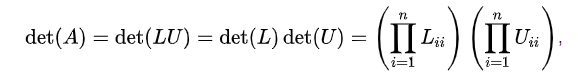

In [ ]:
np.linalg.det(a)

In [ ]:
np.linalg.det(L)

In [ ]:
np.linalg.det(U)

**Что и следывало доказать, определитель матрицы А равен произведению детерминантов матриц L и U**

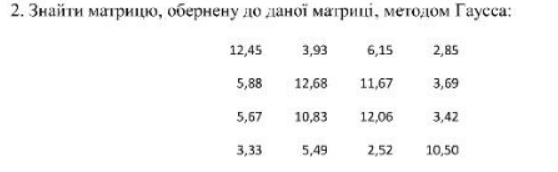

In [8]:
init_a = np.array([[12.45, 3.93, 6.15, 2.85],
              [5.88, 12.68, 11.67, 3.69],
              [5.67, 10.83, 12.06, 3.42],
              [3.33, 5.49, 2.52, 10.50]])

In [10]:
# Reading order of matrix
n = int(input('Enter order of matrix: '))

# Making numpy array of n x 2n size and initializing 
# to zero for storing augmented matrix
a = np.zeros((n,2*n))
a_inv = []

# Reading matrix coefficients
print('Enter Matrix Coefficients:')
for i in range(n):
    for j in range(n):
        a[i][j] = float(input( 'a['+str(i)+']['+ str(j)+']='))

# Augmenting Identity Matrix of Order n
for i in range(n):        
    for j in range(n):
        if i == j:
            a[i][j+n] = 1

# Applying Guass Jordan Elimination
for i in range(n):
    if a[i][i] == 0.0:
        sys.exit('Divide by zero detected!')
        
    for j in range(n):
        if i != j:
            ratio = a[j][i]/a[i][i]

            for k in range(2*n):
                a[j][k] = a[j][k] - ratio * a[i][k]

# Row operation to make principal diagonal element to 1
for i in range(n):
    divisor = a[i][i]
    for j in range(2*n):
        a[i][j] = a[i][j]/divisor

# Displaying Inverse Matrix
print('\nINVERSE MATRIX IS:')
for i in range(n):
    for j in range(n, 2*n):
        a_inv.append(a[i][j])
        print(a[i][j], end='\t')
    print()

Enter order of matrix: 4
Enter Matrix Coefficients:
a[0][0]=12.45
a[0][1]=3.93
a[0][2]=6.15
a[0][3]=2.85
a[1][0]=5.88
a[1][1]=12.68
a[1][2]=11.67
a[1][3]=3.69
a[2][0]=5.67
a[2][1]=10.83
a[2][2]=12.06
a[2][3]=3.42
a[3][0]=3.33
a[3][1]=5.49
a[3][2]=2.52
a[3][3]=10.50

INVERSE MATRIX IS:
0.10407416116993626	0.09819385915262993	-0.14483515015307974	-0.015581951055618107	
-0.015546625172236785	0.4673266621428603	-0.4408552033972183	-0.016419305328361247	
-0.029953089669152826	-0.4160209696573864	0.5027279640281076	-0.009413900322217766	
-0.01768897128895645	-0.17564153167675686	0.15578301402949077	0.11102408686475242	


In [14]:
a_inv = np.array(a_inv)

In [17]:
a_inv = a_inv.reshape(4, 4)
a_inv

array([[ 0.10407416,  0.09819386, -0.14483515, -0.01558195],
       [-0.01554663,  0.46732666, -0.4408552 , -0.01641931],
       [-0.02995309, -0.41602097,  0.50272796, -0.0094139 ],
       [-0.01768897, -0.17564153,  0.15578301,  0.11102409]])

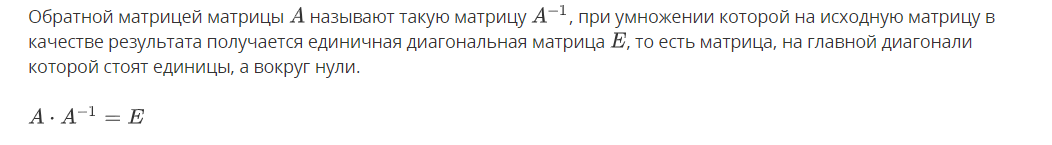

**Cделаем проверку, умножим начальную матрицу на обратную**

In [23]:
result = init_a @ a_inv
np.round(result)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0., -0.,  1.,  0.],
       [-0.,  0.,  0.,  1.]])

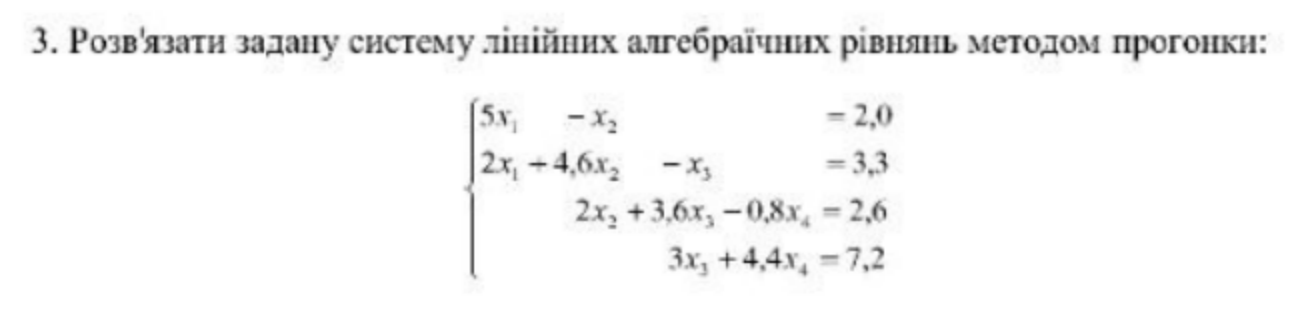

In [34]:
A = np.array([[5., -1., 0., 0.],
              [2., 4.6, -1., 0.],
              [0., 2., 3.6, -0.8],
              [0., 0., 3., 4.4]])

In [35]:
A

array([[ 5. , -1. ,  0. ,  0. ],
       [ 2. ,  4.6, -1. ,  0. ],
       [ 0. ,  2. ,  3.6, -0.8],
       [ 0. ,  0. ,  3. ,  4.4]])

In [32]:
def TDMAsolver(a, b, c, d):
    nf = len(d) # number of equations
    ac, bc, cc, dc = map(np.array, (a, b, c, d)) # copy arrays
    for it in range(1, nf):
        mc = ac[it-1]/bc[it-1]
        bc[it] = bc[it] - mc*cc[it-1] 
        dc[it] = dc[it] - mc*dc[it-1]  
    xc = bc
    xc[-1] = dc[-1]/bc[-1]

    for il in range(nf-2, -1, -1):
        xc[il] = (dc[il]-cc[il]*xc[il+1])/bc[il]

    return xc

In [37]:
A = np.array([[5., -1., 0., 0.],
              [2., 4.6, -1., 0.],
              [0., 2., 3.6, -0.8],
              [0., 0., 3., 4.4]])   

a = np.array([2.,2.,3.]) 
b = np.array([5.,4.6 , 3.6, 4.4])
c = np.array([-1.,-1.,-0.8])
d = np.array([2.0, 3.3, 2.6, 7.2])

print(TDMAsolver(a, b, c, d))

[0.5256 0.628  0.64   1.2   ]


**Проверим решение встроеным методом**

In [39]:
print(np.linalg.solve(A, d))

[0.5256 0.628  0.64   1.2   ]


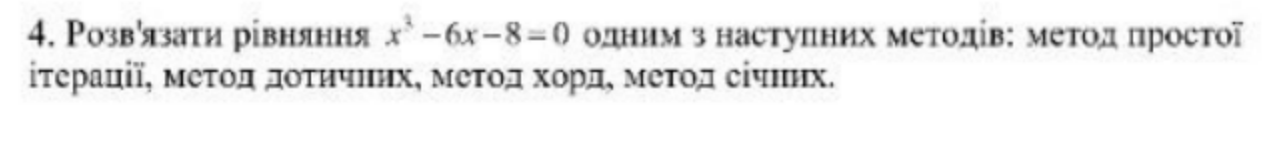

**Метод хорд и метод половинного деления для поиска корней уравнения**

In [49]:
a = 1.0; b = 100.0; e = 0.01

def f(x):
    return (x*x*x) - (6 * x) - 8

y1 = f(a); y2 = f(b)

if y1 * y2 >= 0:
    print ('нету корней')
else:
    n = 1

    #c = (a+b)/2
    c = (y2*a - y1*b)/(y2 - y1);

    y3 = f(c)
    while (abs(y3) > e):
        #c = (a+b)/2
        c = (y2*a - y1*b)/(y2 - y1);

        y3 = f(c)
        if y1 * y3 < 0:
            b = c
        else:
            a = c
        n += 1
    print ("root=%15.10f  n_of_iters=%15.10f" % (c,  n))

root=   2.9508762128  n_of_iters=5150.0000000000
